# Modeling the Refined Data
Using Clustering then Classification Model

### Importing Libraries and Data

In [13]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook as tqdm

#### Loading the Profiles

In [2]:
df = pd.read_csv(r"New_questions.csv")

In [3]:
df

,Name,Love Idiology,love ethics,Relationship,Predictability,Which is important,Broken trust,External description,Interaction description,Self description,Interest
0,B1,0,0,0,0,0,0,0,0,0,0
1,B2,0,0,0,1,1,1,1,1,0,1
2,B3,1,0,0,1,1,1,1,0,1,0
3,B4,1,1,1,0,1,1,1,0,1,1
4,G1,0,0,1,1,0,0,0,0,0,0
5,G2,0,1,1,1,0,0,1,1,1,1
6,G3,1,0,0,1,1,1,1,1,1,1
7,G4,1,1,0,0,1,1,0,1,1,1


In [111]:
# Loading in the cleaned DF
with open("AI-Dating-App/refined_profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'AI-Dating-App/refined_profiles.pkl'

## Clustering the Refined Data

### Vectorizing

In [4]:
def string_convert(x):
    """
    First converts the lists in the DF into strings
    """
    if isinstance(x, list):
        return ' '.join(x)
    else:
        return x
    
# Looping through the columns and applying the function
for col in df.columns:
    df[col] = df[col].apply(string_convert)

In [5]:
df

,Name,Love Idiology,love ethics,Relationship,Predictability,Which is important,Broken trust,External description,Interaction description,Self description,Interest
0,B1,0,0,0,0,0,0,0,0,0,0
1,B2,0,0,0,1,1,1,1,1,0,1
2,B3,1,0,0,1,1,1,1,0,1,0
3,B4,1,1,1,0,1,1,1,0,1,1
4,G1,0,0,1,1,0,0,0,0,0,0
5,G2,0,1,1,1,0,0,1,1,1,1
6,G3,1,0,0,1,1,1,1,1,1,1
7,G4,1,1,0,0,1,1,0,1,1,1


In [6]:
ori_df = df
new_df = df
new_df.drop('Name', axis=1, inplace=True)
df = new_df

In [23]:
df

,Love Idiology,love ethics,Relationship,Predictability,Which is important,Broken trust,External description,Interaction description,Self description,Interest
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,0,1
2,1,0,0,1,1,1,1,0,1,0
3,1,1,1,0,1,1,1,0,1,1
4,0,0,1,1,0,0,0,0,0,0
5,0,1,1,1,0,0,1,1,1,1
6,1,0,0,1,1,1,1,1,1,1
7,1,1,0,0,1,1,0,1,1,1


In [24]:
df

,Love Idiology,love ethics,Relationship,Predictability,Which is important,Broken trust,External description,Interaction description,Self description,Interest
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,1,0,1
2,1,0,0,1,1,1,1,0,1,0
3,1,1,1,0,1,1,1,0,1,1
4,0,0,1,1,0,0,0,0,0,0
5,0,1,1,1,0,0,1,1,1,1
6,1,0,0,1,1,1,1,1,1,1
7,1,1,0,0,1,1,0,1,1,1


In [25]:
def vectorization(df, columns):
    """
    Using recursion, iterate through the df until all the categories have been vectorized
    """
    column_name = columns[0]
    column_name = str(column_name)
    
    # Checking if the column name has been removed already
    if column_name not in ['Love Idiology','love ethics','Relationship','Predictability','Which is important','Broken trust','External description','Interaction description','Self description','Interest']:
        return df
    
#     if column_name in ['Love Idiology','love ethics']:
# #         df[column_name.lower()] = df[column_name].cat.codes
#         df[column_name] = df[column_name].astype('category')
#         df = dict(enumerate(df[column_name].cat.categories))
#         df = pd.DataFrame.from_dict(df, orient='index')
# #         print(df)
#         df = df.drop(column_name, 1)
        
#         return vectorization(df, df.columns)
    
    else:
        # Instantiating the Vectorizer
        vectorizer = CountVectorizer()
#         cv = CountVectorizer(lowercase=False)
        print(df[column_name])
        
        # Fitting the vectorizer to the Bios
#         x = vectorizer.fit_transform(df[column_name])

        # Creating a new DF that contains the vectorized words
#         df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
        df_wrds = pd.DataFrame(columns=vectorizer.get_feature_names())
        # Concating the words DF with the original DF
        new_df = pd.concat([df, df_wrds], axis=1)

        # Dropping the column because it is no longer needed in place of vectorization
#         new_df = new_df.drop(column_name, axis=1)
        new_df = new_df.drop(column_name, axis=1)
    
        return vectorization(new_df, new_df.columns) 

In [41]:
# Creating the vectorized DF
vect_df = vectorization(df, df.columns)

0    0
1    0
2    1
3    1
4    0
5    0
6    1
7    1
Name: Love Idiology, dtype: int64


NotFittedError: Vocabulary not fitted or provided

In [42]:
# Scaling
scaler = MinMaxScaler()

vect_df = pd.DataFrame(scaler.fit_transform(vect_df), index=vect_df.index, columns=vect_df.columns)

NameError: name 'vect_df' is not defined

In [40]:
vect_df

NameError: name 'vect_df' is not defined

### PCA

In [28]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(df)

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
print(total_explained_variance)
n_over_9 = len(total_explained_variance[total_explained_variance>=0])
print(n_over_9)
n_to_reach_9 = df.shape[1] - n_over_9
print(df.shape[1])
print(n_to_reach_9)
print("PCA reduces the # of features from", df.shape[1], 'to', n_to_reach_9)

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_9)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

[0.41305035 0.61415962 0.7907053  0.911528   0.96415958 0.99083848
 1.         1.        ]
8
10
2
PCA reduces the # of features from 10 to 2


0.61415962317436

### Performing Hierarchical Agglomerative Clustering
- First finding the optimum number of clusters

In [36]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2,5,1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# The DF for evaluation
eval_df = df_pca

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    clust = AgglomerativeClustering(n_clusters=i, linkage='complete')
    
    clust.fit(eval_df)
    
    cluster_assignments = clust.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(eval_df, cluster_assignments))
    
    s_scores.append(silhouette_score(eval_df, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(eval_df, cluster_assignments))

/home/dark-flash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/3 [00:00<?, ?it/s]

### Helper Function to Evaluate the Clusters

In [37]:
def cluster_eval(y, x):
    """
    Prints the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('bmh')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Evaluation of Clusters

The Calinski-Harabasz Score (find max score):
Max Value:
Cluster #    Cluster Score
4      24.169438

Min Value:
Cluster #    Cluster Score
2       8.192651


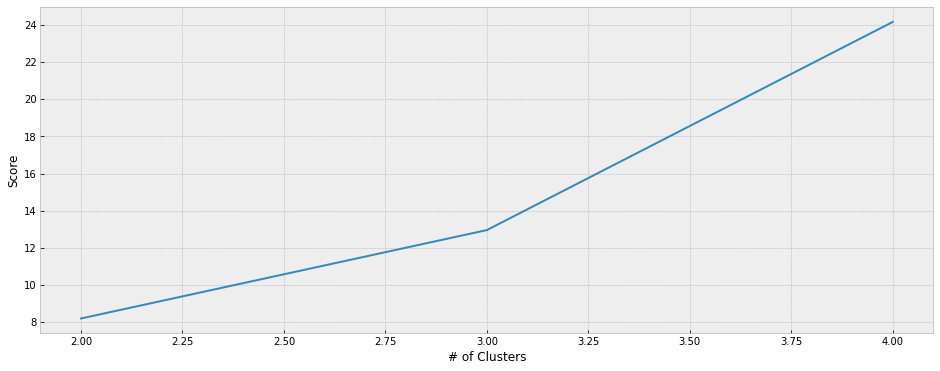


The Silhouette Coefficient Score (find max score):
Max Value:
Cluster #    Cluster Score
4       0.531927

Min Value:
Cluster #    Cluster Score
3       0.522251


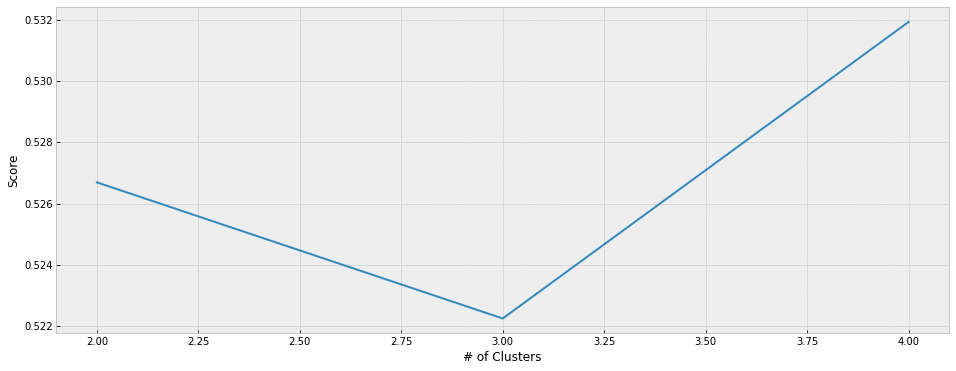


The Davies-Bouldin Score (find minimum score):
Max Value:
Cluster #    Cluster Score
3       0.590811

Min Value:
Cluster #    Cluster Score
4       0.351133


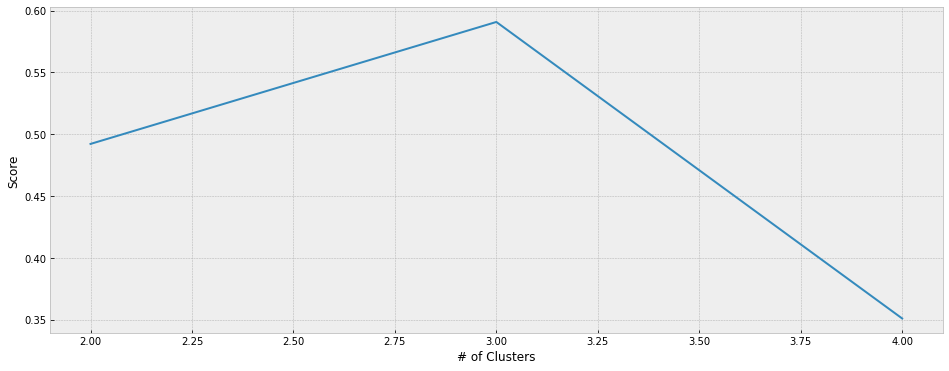

In [38]:
print("The Calinski-Harabasz Score (find max score):")
cluster_eval(ch_scores, cluster_cnt)

print("\nThe Silhouette Coefficient Score (find max score):")
cluster_eval(s_scores, cluster_cnt)

print("\nThe Davies-Bouldin Score (find minimum score):")
cluster_eval(db_scores, cluster_cnt)

### Running HAC
Again but with the optimum cluster count

In [43]:
# Instantiating HAC based on the optimum number of clusters found
hac = AgglomerativeClustering(n_clusters=3, linkage='complete')

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# vect_df['Cluster #'] = cluster_assignments

#### Exporting the Clustered DF and Vectorized DF

In [56]:
with open("refined_cluster.pkl",'wb') as fp:
    pickle.dump(df, fp)
    
# with open("vectorized_refined1.pkl", 'wb') as fp:
#     pickle.dump(vect_df, fp)

NameError: name 'vect_df' is not defined

## Classification of the New Profile

### Importing the Different Classification Models

In [46]:
# Importing 3 models
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

### Train, test, splitting

In [47]:
# Assigning the split variables
X = df.drop(["Cluster #"], 1)
y = df['Cluster #']

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Finding the Best Model
- Dummy (Baseline Model)
- KNN
- SVM
- NaiveBayes
- Logistic Regression
- Adaboost

In [48]:
# Dummy
dummy = DummyClassifier(strategy='stratified')

# KNN
knn = KNeighborsClassifier()

# SVM
svm = SVC(gamma='scale')

# NaiveBayes
nb = ComplementNB()

# Logistic Regression
lr = LogisticRegression()

# Adaboost
adab = AdaBoostClassifier()

# List of models
models = [dummy, knn, svm, nb, lr, adab]

# List of model names
names = ['Dummy', 'KNN', 'SVM', 'NaiveBayes', 'Logistic Regression', 'Adaboost']

# Zipping the lists
classifiers = dict(zip(names, models))

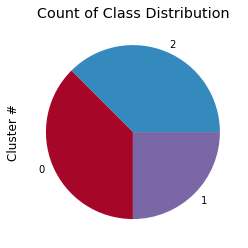

In [50]:
# Visualization of the different cluster counts
df['Cluster #'].value_counts().plot(kind='pie', title='Count of Class Distribution');#Series.plot(kind='pie')

Since we are dealing with an imbalanced dataset _(because each cluster is not guaranteed to have the same amount of profiles)_, we will resort to using the __Macro Avg__ and __F1 Score__ for evaluating the performances of each model.

In [51]:
# Dictionary containing the model names and their scores
models_f1 = {}

# Looping through each model's predictions and getting their classification reports
for name, model in tqdm(classifiers.items()):
    # Fitting the model
    model.fit(X_train, y_train)
    
    print('\n'+ name + ' (Macro Avg - F1 Score):')
    
    # Classification Report
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    f1 = report['macro avg']['f1-score']
    
    # Assigning to the Dictionary
    models_f1[name] = f1
    
    print(f1)

/home/dark-flash/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/6 [00:00<?, ?it/s]

/home/dark-flash/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dark-flash/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dark-flash/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dark-flash/.local/lib/python3.


Dummy (Macro Avg - F1 Score):
0.3333333333333333

KNN (Macro Avg - F1 Score):
0.3333333333333333

SVM (Macro Avg - F1 Score):
0.0

NaiveBayes (Macro Avg - F1 Score):
0.3333333333333333

Logistic Regression (Macro Avg - F1 Score):
1.0


/home/dark-flash/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Adaboost (Macro Avg - F1 Score):
0.3333333333333333


/home/dark-flash/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dark-flash/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dark-flash/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model with the Best Performance

In [52]:
print(max(models_f1, key=models_f1.get), 'Score:', max(models_f1.values()))

Logistic Regression Score: 1.0


### Fitting the Best Model to our Dataset
_(Optional: Tune the model with GridSearch)_

In [53]:
# Fitting the model
nb.fit(X, y)

ComplementNB()

### Saving the Classification Model
For future use

In [54]:
from joblib import dump

dump(nb, "refined_model1.joblib")

['refined_model1.joblib']